In [101]:
#Importing in the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [102]:
df=pd.read_csv('train.csv')

In [103]:
#Exploratory Data Analysis

In [104]:
df.shape

(9800, 18)

In [105]:
df.sample(6)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
1028,1029,CA-2015-163552,11/07/2015,15/07/2015,Standard Class,LA-16780,Laura Armstrong,Corporate,United States,Hackensack,New Jersey,7601.0,East,OFF-PA-10000474,Office Supplies,Paper,Easy-staple paper,177.200
7953,7954,CA-2015-138359,01/04/2015,06/04/2015,Standard Class,KH-16330,Katharine Harms,Corporate,United States,Revere,Massachusetts,2151.0,East,OFF-ST-10000636,Office Supplies,Storage,Rogers Profile Extra Capacity Storage Tub,66.960
4131,4132,CA-2016-111703,02/07/2016,09/07/2016,Standard Class,KB-16315,Karl Braun,Consumer,United States,Hollywood,Florida,33021.0,South,OFF-PA-10000349,Office Supplies,Paper,Easy-staple paper,11.952
3901,3902,CA-2016-151043,14/11/2016,20/11/2016,Standard Class,MG-17680,Maureen Gastineau,Home Office,United States,Philadelphia,Pennsylvania,19143.0,East,TEC-AC-10001090,Technology,Accessories,Micro Innovations Wireless Classic Keyboard wi...,47.984
7820,7821,CA-2018-152436,08/12/2018,10/12/2018,Second Class,CW-11905,Carl Weiss,Home Office,United States,Cranston,Rhode Island,2920.0,East,OFF-ST-10000036,Office Supplies,Storage,Recycled Data-Pak for Archival Bound Computer ...,592.740
1997,1998,CA-2015-131905,06/02/2015,09/02/2015,First Class,ND-18460,Neil Ducich,Corporate,United States,Chesapeake,Virginia,23320.0,South,OFF-LA-10002787,Office Supplies,Labels,Avery 480,15.000


In [106]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [108]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


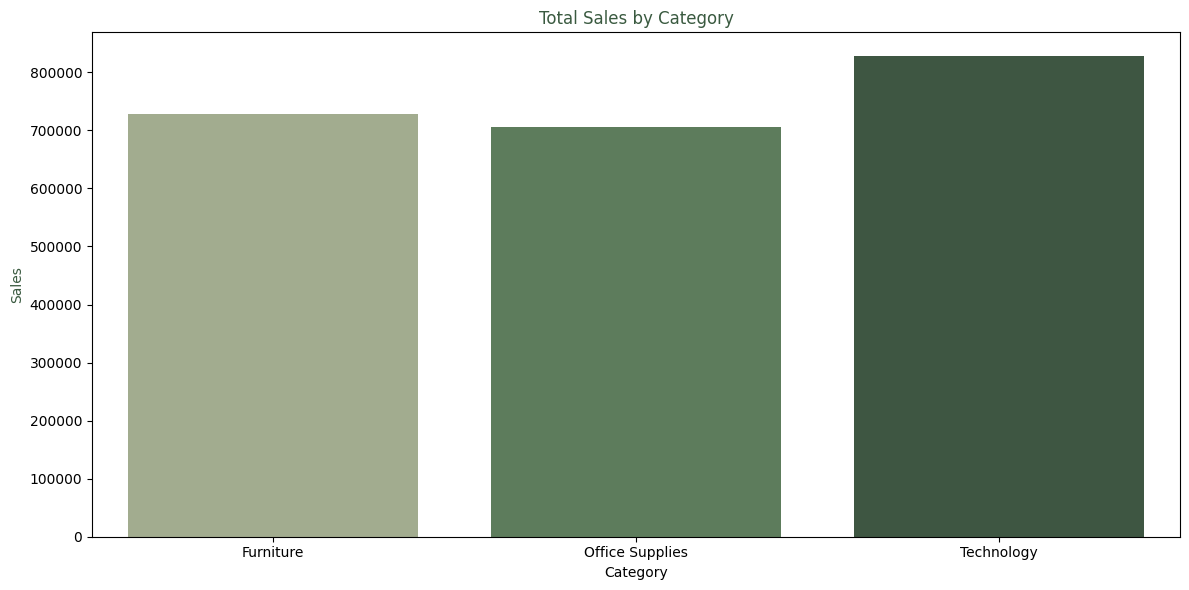

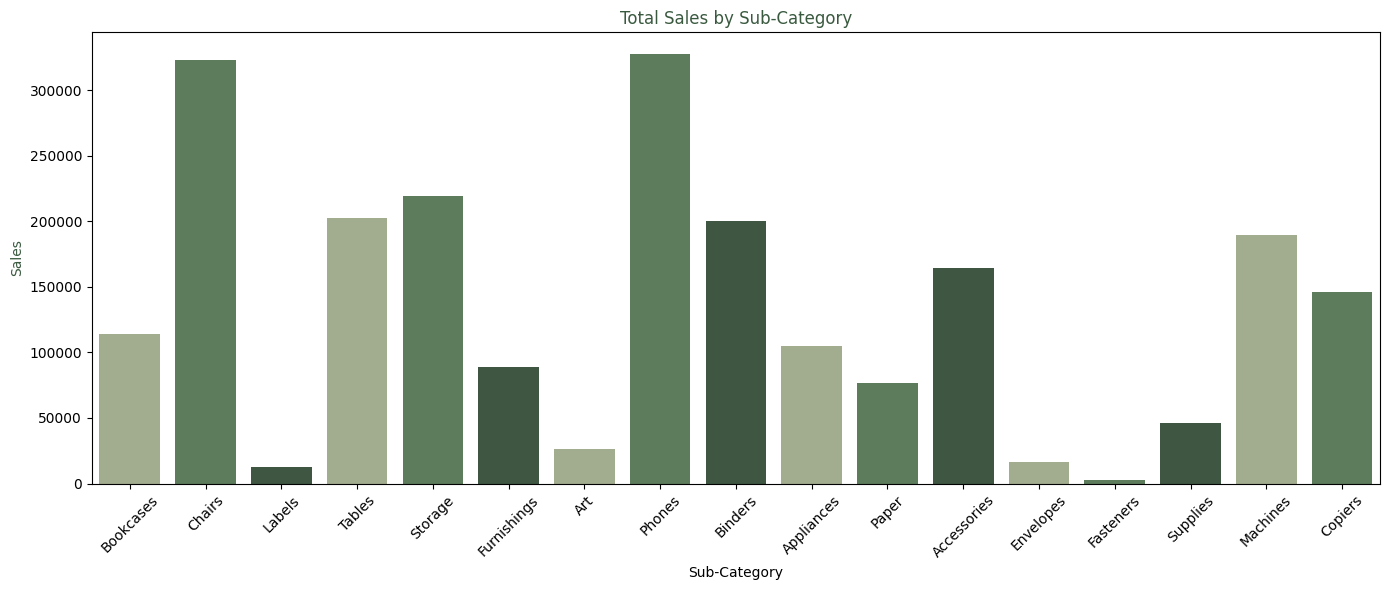

In [110]:
#Sales by Category and Sub-Category
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Category', y='Sales', estimator='sum', ci=None,palette=custom_palette)
plt.title('Total Sales by Category',color=custom_palette[2])
plt.ylabel('Sales',color=custom_palette[2])
plt.tight_layout()
plt.show()

num_subcats = df['Sub-Category'].nunique()
from itertools import cycle
cycled_palette = [color for color, _ in zip(cycle(custom_palette), range(num_subcats))]


plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='Sub-Category', y='Sales', estimator='sum', ci=None,palette=cycled_palette)
plt.title('Total Sales by Sub-Category',color=custom_palette[2])
plt.xticks(rotation=45)
plt.ylabel('Sales',color=custom_palette[2])
plt.tight_layout()
plt.show()

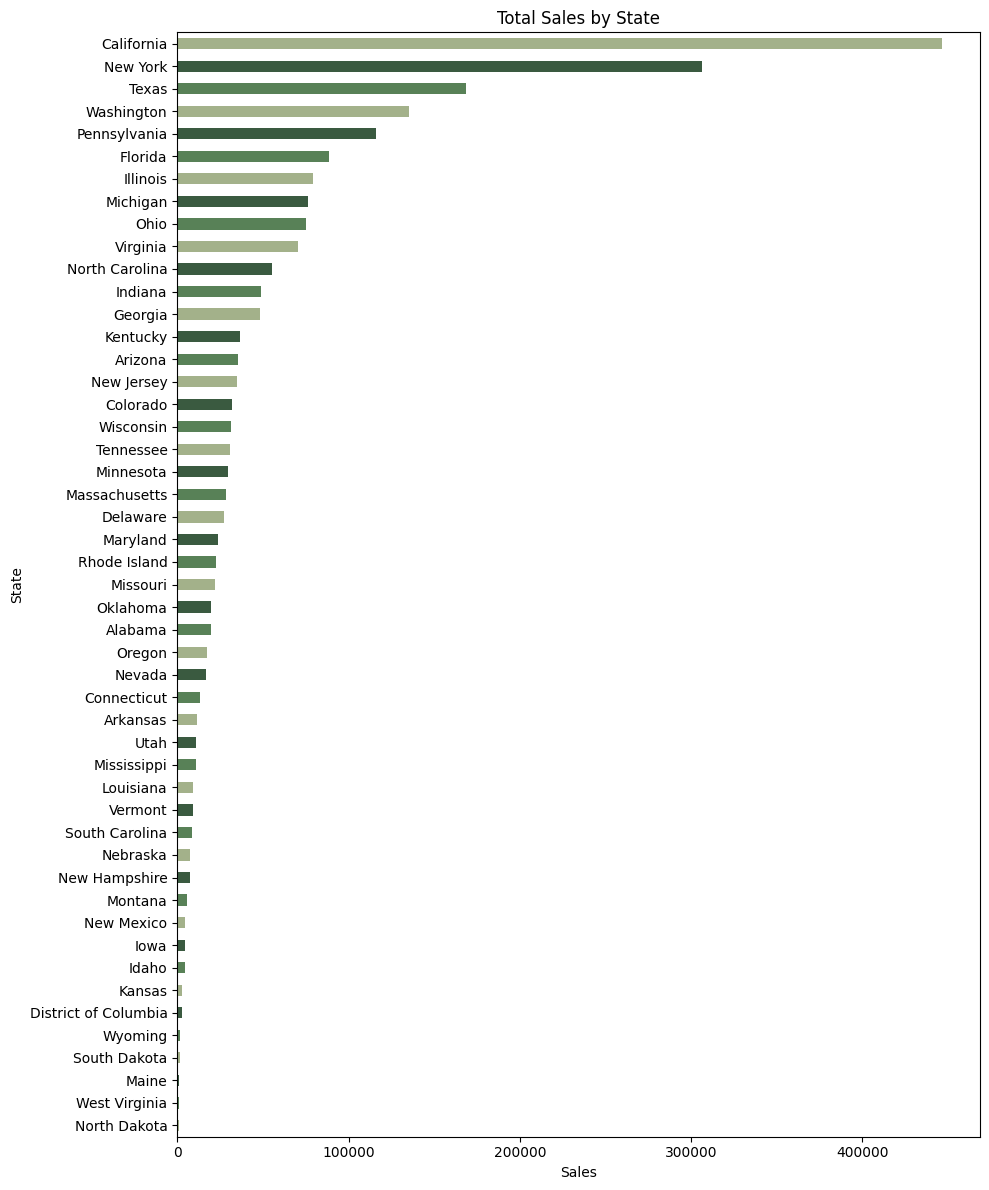

In [111]:
# Sales by State
state_sales = df.groupby('State')['Sales'].sum().sort_values()

plt.figure(figsize=(10, 12))
state_sales.plot(kind='barh', color= ['#a3b18a', '#588157', '#3a5a40'])
plt.title('Total Sales by State')
plt.xlabel('Sales')
plt.tight_layout()
plt.show()

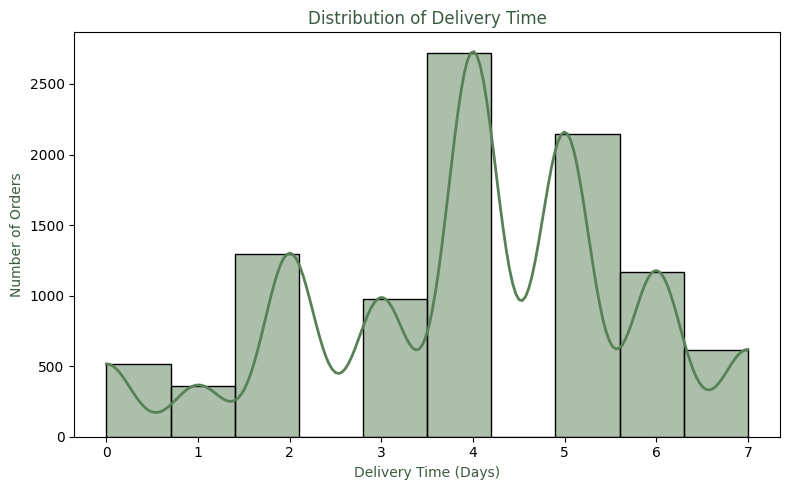

In [112]:
# Order Processing/Delivery Time
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)
df['Delivery Time (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days

plt.figure(figsize=(8, 5))
sns.histplot(df['Delivery Time (Days)'], bins=10, kde=True,color=custom_palette[1], line_kws={'color': custom_palette[2], 'linewidth': 2})
plt.title('Distribution of Delivery Time',color=custom_palette[2])
plt.xlabel('Delivery Time (Days)',color=custom_palette[2])
plt.ylabel('Number of Orders',color=custom_palette[2])
plt.tight_layout()
plt.show()

In [113]:
#Data Cleanig

In [114]:
#Drop the postal code column(it has missing values and the column in its self won't help the model)
df = df.drop(columns=['Postal Code'],axis=1,errors='ignore')

#Drop the ID columns(identifier column)
columns_to_drop = [
    'Order ID',
    'Customer ID',
    'Customer Name',
    'Product ID',
    'Product Name',
    'Row ID'
]
df = df.drop(columns=columns_to_drop,axis=1,errors='ignore')

In [115]:
df.dtypes

Order Date              datetime64[ns]
Ship Date               datetime64[ns]
Ship Mode                       object
Segment                         object
Country                         object
City                            object
State                           object
Region                          object
Category                        object
Sub-Category                    object
Sales                          float64
Delivery Time (Days)             int64
dtype: object

In [116]:
df_original=df.copy()

In [117]:
duplicate_count = df_original.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 2


In [118]:
df=df.drop_duplicates()

In [119]:
#measures the asymmetry of the data distribution
#0 → perfectly symmetrical
#>0 → Positive skew
#<0 → Negative skew
df['Sales'].skew()

np.float64(12.982316721948633)

In [120]:
#The data is strongly positively skewed — meaning most values are small, but a few are extremely high.

In [121]:
import numpy as np

# Apply log transformation
df['Log_Sales'] = np.log1p(df['Sales'])

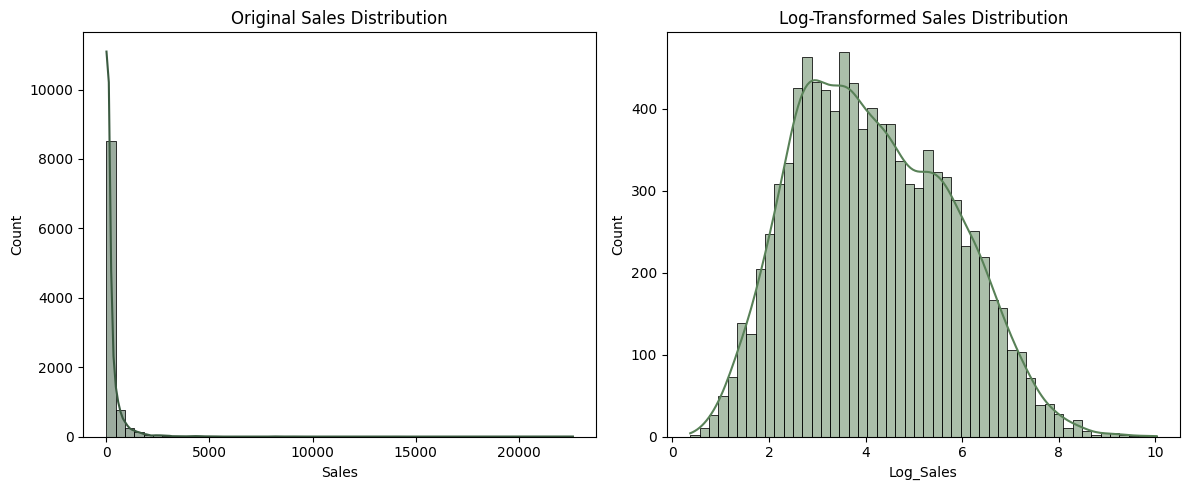

In [122]:
plt.figure(figsize=(12, 5))

# Before
plt.subplot(1, 2, 1)
sns.histplot(df['Sales'], bins=50, kde=True,color=custom_palette[2])
plt.title('Original Sales Distribution')

# After
plt.subplot(1, 2, 2)
sns.histplot(df['Log_Sales'], bins=50, kde=True,color=custom_palette[1])
plt.title('Log-Transformed Sales Distribution')

plt.tight_layout()
plt.show()

In [123]:
#Feature Engineering

In [124]:
#Extract Time-Based Features
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day
df['Order DayOfWeek'] = df['Order Date'].dt.dayofweek
df['Order Week'] = df['Order Date'].dt.isocalendar().week.astype(int)
df['Order Year'] = df['Order Date'].dt.year

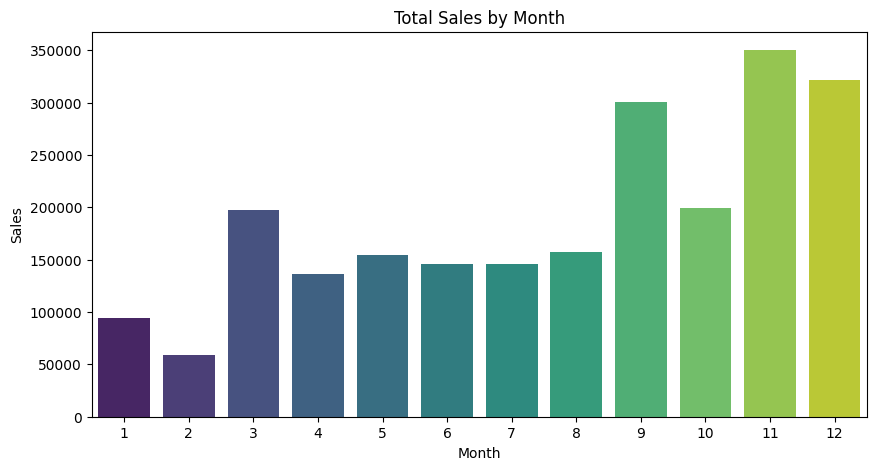

In [147]:
monthly_sales = df.groupby('Order Month')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_sales, x='Order Month', y='Sales', palette='viridis')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

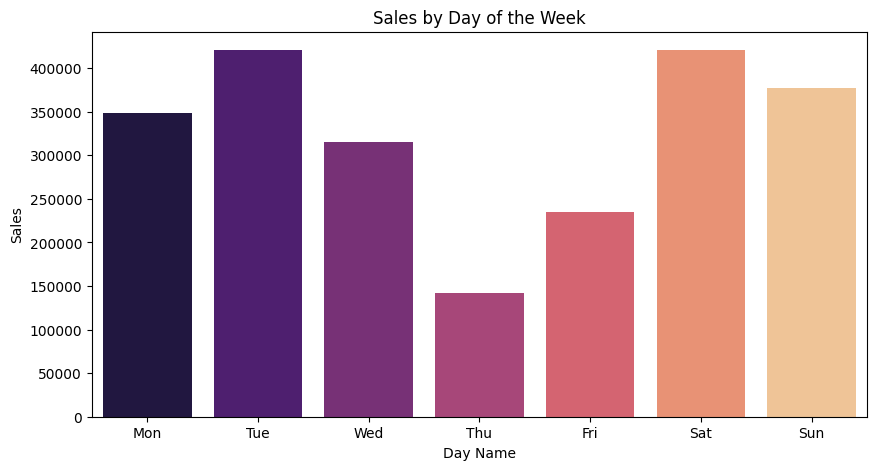

In [148]:
dow_sales = df.groupby('Order DayOfWeek')['Sales'].sum().reset_index()

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dow_sales['Day Name'] = dow_sales['Order DayOfWeek'].map(dict(zip(range(7), days)))

plt.figure(figsize=(10, 5))
sns.barplot(data=dow_sales, x='Day Name', y='Sales', order=days, palette='magma')
plt.title('Sales by Day of the Week')
plt.show()

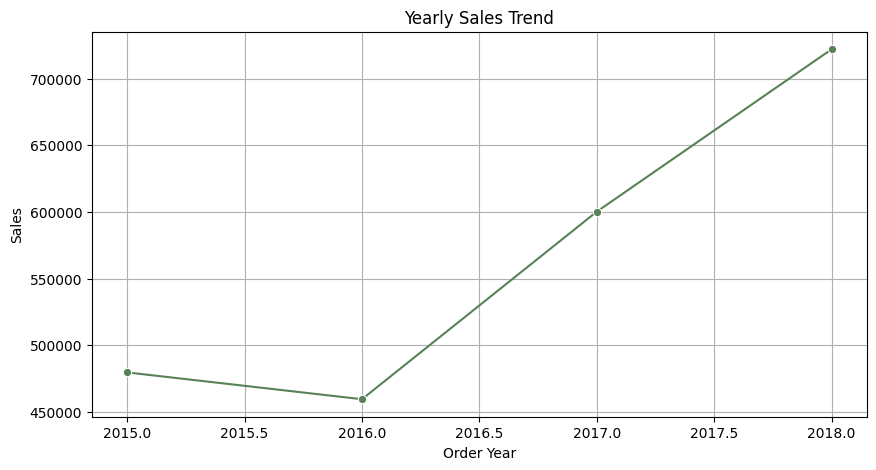

In [149]:
yearly_sales = df.groupby('Order Year')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_sales, x='Order Year', y='Sales', marker='o', color='#588157')
plt.title('Yearly Sales Trend')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

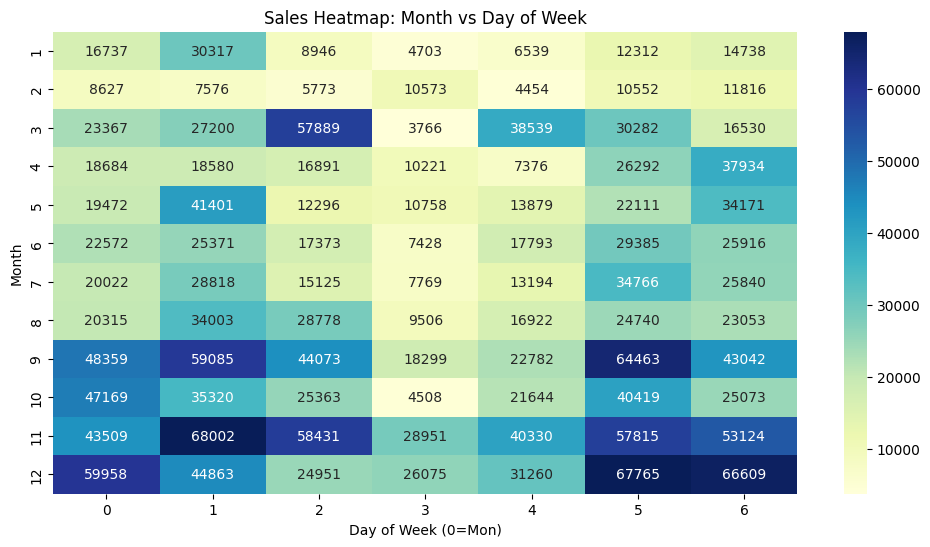

In [146]:
heatmap_data = df.pivot_table(index='Order Month', columns='Order DayOfWeek', values='Sales', aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Sales Heatmap: Month vs Day of Week')
plt.xlabel('Day of Week (0=Mon)')
plt.ylabel('Month')
plt.show()


In [125]:
#Create a new column for Delivery Duration
df['Delivery Time (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days

In [126]:
def delivery_speed(x):
    if x == 0:
        return 'Same Day'
    elif x <= 2:
        return 'Fast'
    elif x <= 5:
        return 'Normal'
    else:
        return 'Slow'

df['Delivery Speed'] = df['Delivery Time (Days)'].apply(delivery_speed)

In [127]:
df.head(6)

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Delivery Time (Days),Log_Sales,Order Month,Order Day,Order DayOfWeek,Order Week,Order Year,Delivery Speed
0,2017-11-08,2017-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,3,5.572002,11,8,2,45,2017,Normal
1,2017-11-08,2017-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,6.597064,11,8,2,45,2017,Normal
2,2017-06-12,2017-06-16,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,4,2.748552,6,12,0,24,2017,Normal
3,2016-10-11,2016-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,7,6.865450,10,11,1,41,2016,Slow
4,2016-10-11,2016-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,7,3.151368,10,11,1,41,2016,Slow
5,2015-06-09,2015-06-14,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,48.8600,5,3.909219,6,9,1,24,2015,Normal


In [128]:
is_sorted = df['Order Date'].is_monotonic_increasing
print("Is the data sorted by date?", is_sorted)

Is the data sorted by date? False


In [129]:
df = df.sort_values(by='Order Date')

In [130]:
print(df['Order Date'].is_monotonic_increasing)

True


In [131]:
df = df.reset_index(drop=True)

In [132]:
df = df.set_index('Order Date')

In [133]:
monthly_sales = df['Sales'].resample('M').sum().reset_index()

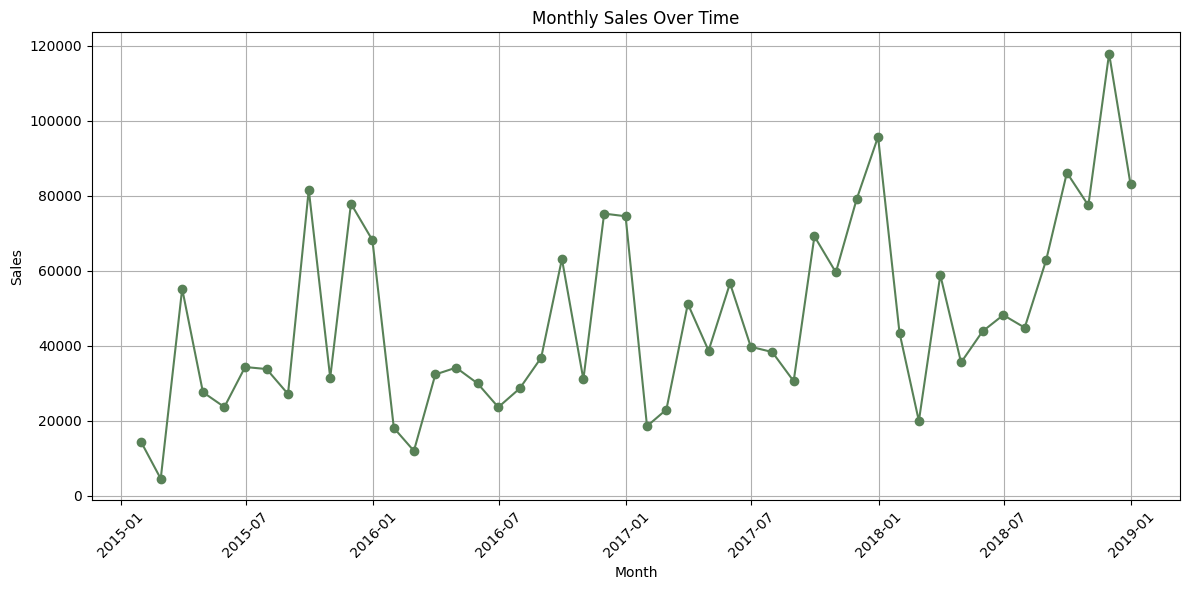

In [134]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], marker='o',color=custom_palette[1])
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [135]:
monthly_sales = monthly_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

In [136]:
monthly_sales['y'] = np.log(monthly_sales['y'])

In [137]:
from prophet import Prophet

model = Prophet()
model.fit(monthly_sales)

17:50:47 - cmdstanpy - INFO - Chain [1] start processing
17:50:48 - cmdstanpy - INFO - Chain [1] done processing


In [138]:
future = model.make_future_dataframe(periods=12, freq='M')

In [139]:
forecast = model.predict(future)

In [140]:
import numpy as np

forecast['predicted_sales'] = np.exp(forecast['yhat'])
forecast['lower_sales'] = np.exp(forecast['yhat_lower'])
forecast['upper_sales'] = np.exp(forecast['yhat_upper'])

In [141]:
forecast[['ds', 'predicted_sales']].tail(12)

,ds,predicted_sales
48,2019-01-31,35490.742485
49,2019-02-28,14774.239440
50,2019-03-31,113198.317450
51,2019-04-30,52209.690854
52,2019-05-31,51205.797349
53,2019-06-30,66047.022923
54,2019-07-31,58766.132135
55,2019-08-31,52641.194567
56,2019-09-30,127997.690581
57,2019-10-31,74531.253411


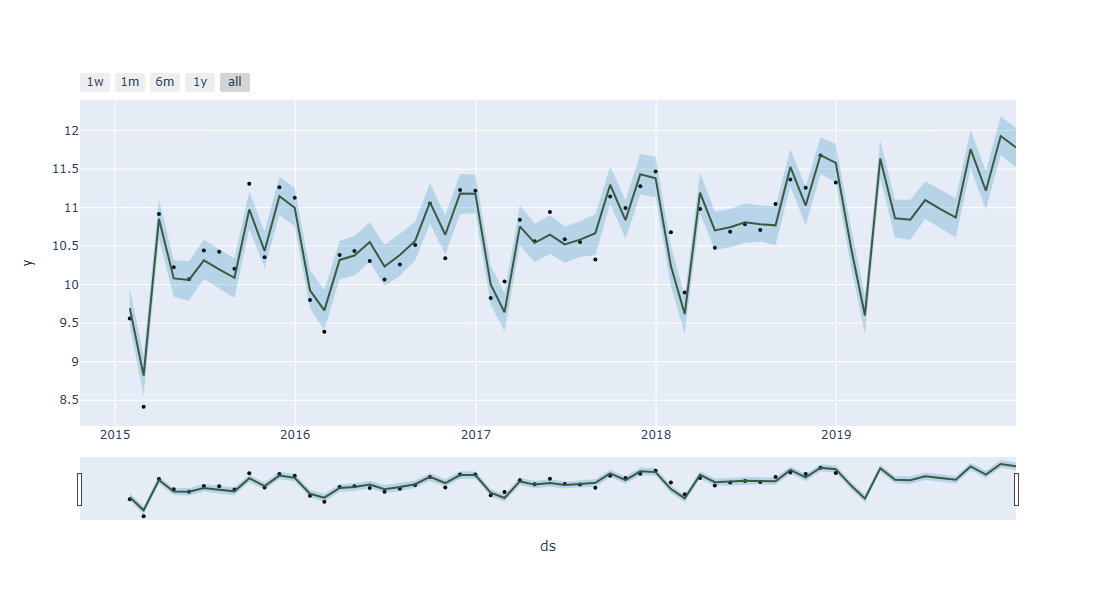

In [142]:
#Exploring Prophet's full forecast with uncertaint
import plotly.graph_objects as g
from prophet.plot import plot_plotly

fig=plot_plotly(model, forecast)
for i, trace in enumerate(fig.data):
    if i < len(custom_palette):
        trace.line.color = custom_palette[i]
fig.show()

In [143]:
results = forecast[['ds', 'yhat']].merge(monthly_sales, on='ds')

In [144]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
mae = mean_absolute_error(results['y'], results['yhat'])
rmse = np.sqrt(mean_squared_error(results['y'], results['yhat']))
mape = mean_absolute_percentage_error(results['y'], results['yhat'])

print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape * 100:.2f}%")

MAE (Mean Absolute Error): 0.16
RMSE (Root Mean Squared Error): 0.20
MAPE (Mean Absolute Percentage Error): 1.53%


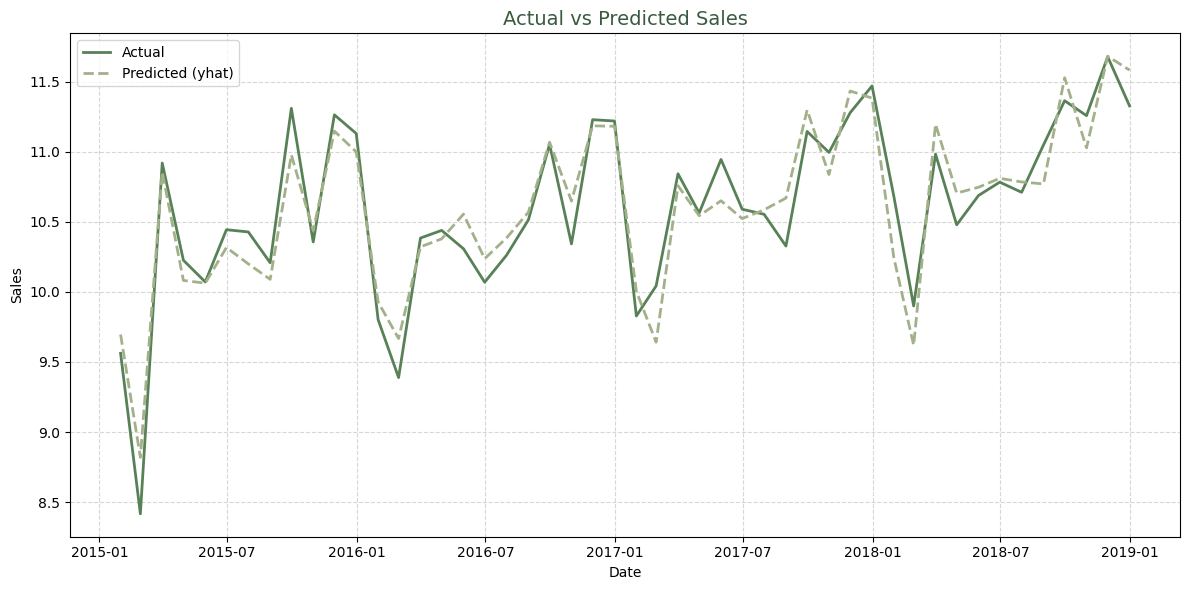

In [145]:
#Evaluating accuracy of the model vs real-world values
plt.figure(figsize=(12, 6))
plt.plot(results['ds'], results['y'], label='Actual', color=custom_palette[1], linewidth=2)
plt.plot(results['ds'], results['yhat'], label='Predicted (yhat)', color=custom_palette[0], linewidth=2, linestyle='--')
plt.title('Actual vs Predicted Sales', fontsize=14, color=custom_palette[2])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()